In [30]:
# 1번: 데이터 불러오기
# '팔머 펭귄 데이터'가 담겨있는 URL에서 데이터를 직접 불러와 DataFrame으로 만들어주는 코드를 작성해보세요.

import pandas as pd
url =  'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
penguin_data = pd.read_csv(url)

In [31]:
penguin_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [9]:
list(penguin_data.columns)

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex',
 'year']

In [10]:
# 2번: 데이터 구조 확인
# 팔머 펭귄 데이터의 구조를 확인하려고 합니다.
# 데이터의 열 개수(n_var), 행의 개수(n_sample), 열 이름들(names_var)을 출력하는 코드를 작성해보세요.
# code from 1번

n_var = len(penguin_data.columns)
n_sample = len(penguin_data.index)
names_var = list(penguin_data.columns)

print(n_var)
print(n_sample)
print(names_var)

8
344
['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']


In [12]:
n_var = penguin_data.shape[1]
n_sample = penguin_data.shape[0]
names_var = penguin_data.columns

print(n_var)
print(n_sample)
print(names_var)

8
344
Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


In [33]:
# 3번: 데이터 전처리
# 팔머 펭귄 데이터에서 불완전한 데이터에 대한 정보를 확인해보고, 불완전한 데이터를 제거한 데이터의 크기를 출력하는 코드를 작성해보세요.

missing_info = penguin_data.isna().sum()
incomplete_data = penguin_data[penguin_data.sex.notnull() == False]
penguin_data = penguin_data.dropna()

print(missing_info)
print(incomplete_data)
print(penguin_data.shape)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64
    species     island  bill_length_mm  ...  body_mass_g  sex  year
3    Adelie  Torgersen             NaN  ...          NaN  NaN  2007
8    Adelie  Torgersen            34.1  ...       3475.0  NaN  2007
9    Adelie  Torgersen            42.0  ...       4250.0  NaN  2007
10   Adelie  Torgersen            37.8  ...       3300.0  NaN  2007
11   Adelie  Torgersen            37.8  ...       3700.0  NaN  2007
47   Adelie      Dream            37.5  ...       2975.0  NaN  2007
178  Gentoo     Biscoe            44.5  ...       4100.0  NaN  2007
218  Gentoo     Biscoe            46.2  ...       4650.0  NaN  2008
256  Gentoo     Biscoe            47.3  ...       4725.0  NaN  2009
268  Gentoo     Biscoe            44.5  ...       4875.0  NaN  2009
271  Gentoo     Biscoe             NaN  ...    

In [34]:
penguin_data[penguin_data.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


In [37]:
# 4번: 데이터 변수 선택
# 데이터 분석에 사용하지 않는 island, year column을 제거한 뒤 데이터를 출력하는 코드를 작성하세요.
penguin_data = penguin_data.drop(['island','year'], axis=1)
penguin_data

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,male
1,Adelie,39.5,17.4,186.0,3800.0,female
2,Adelie,40.3,18.0,195.0,3250.0,female
4,Adelie,36.7,19.3,193.0,3450.0,female
5,Adelie,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,male
340,Chinstrap,43.5,18.1,202.0,3400.0,female
341,Chinstrap,49.6,18.2,193.0,3775.0,male
342,Chinstrap,50.8,19.0,210.0,4100.0,male


# 분포의 중심을 잡는 지표

In [38]:
# 1번 평균
# 앞선 '데이터의 구조의 이해' 콘텐츠에서 우리는 팔머 펭귄(Palmer penguins) 데이터를 불러오고, 완전한 표본들만을 골라서, 분석에 필요한 변수들을 선택했어요.
# penguin_data 데이터의 정량적 변수들(quantative variable) 의 평균을 구해보세요.
import pandas as pd

# load data
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
penguin_data = pd.read_csv(url)

# data pre-processing
penguin_data = penguin_data[~penguin_data.isnull().any(axis = 1)]
penguin_data = penguin_data.drop(["island", "year"], axis = 1)

var_means = penguin_data.mean()
var_means

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

In [39]:
# 2번 : 중앙값
# 평균과 함께 많이 쓰이는 통계지표로 중앙값(median)이 있습니다.
# penguin_data 데이터의 정량적 변수들(quantative variable)의 중앙값(median) 을 구하는 코드를 작성해보세요.

var_medians = penguin_data.median()
var_medians

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

In [43]:
# 3번 : 중앙값과 평균의 성질 이해 (1)
# 평균과 중앙값을 계산해 보았으니, 성질에 대해서도 알아봅시다.
# 펭귄 데이터에 상수 2를 곱하고 10을 더한 새로운 데이터 penguin_data_new의 중앙값과 평균을
# 펭귄 데이터의 중앙값과 평균에 상수 2를 곱하고 10을 더한 값과 비교하는 코드를 작성해보세요.

### Python package load ###
import warnings
import numpy  as np
import pandas as pd
import matplotlib as plt
warnings.simplefilter(action='ignore', category=FutureWarning)

# data set load
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
penguin_data = pd.read_csv(url)

# data set examination
penguin_data = penguin_data[~penguin_data.isnull().any(axis=1)]
penguin_data = penguin_data.drop(["island", "year"], axis = 1)
penguin_data = penguin_data.drop(["species", "sex"], axis = 1)

mean_vec = penguin_data.mean()
median_vec = penguin_data.median()

penguin_data_new = (penguin_data * 2.0) + 10

mean_vec_new = penguin_data_new.mean()
median_vec_new = penguin_data_new.median()

print((mean_vec * 2.0 + 10.0) - mean_vec_new)
print((median_vec * 2.0 + 10.0) - median_vec_new)


bill_length_mm      -1.421085e-14
bill_depth_mm        1.421085e-14
flipper_length_mm    0.000000e+00
body_mass_g          0.000000e+00
dtype: float64
bill_length_mm       0.0
bill_depth_mm        0.0
flipper_length_mm    0.0
body_mass_g          0.0
dtype: float64


In [44]:
# 4번 : 중앙값과 평균의 성질 이해 (2)
# 펭귄 데이터의 부리 길이를 length 변수로, 
# 부리 깊이를 depth 변수로 저장한 뒤 평균과 중앙값을 구하고, 
# 첫번째 변수를 +1000으로, 
# 마지막 변수를 -1000으로 바꾼 뒤 평균과 중앙값을 구해서 서로 비교해 보는 코드를 작성하세요.

length = penguin_data["bill_length_mm"].to_numpy(dtype="float")
depth = penguin_data["bill_depth_mm"].to_numpy(dtype="float")

# mean and median for length, depth
length_mean = length.mean()
length_median = np.median(length)
depth_mean = depth.mean()
depth_median = np.median(depth)

# value change
length[0] = length[0] + 1000
depth[-1] = depth[-1] - 1000

# new mean and median for length, depth
length_mean_new = length.mean()
length_median_new = np.median(length)
depth_mean_new = depth.mean()
depth_median_new = np.median(depth)

# compare the result
length_mean_new > length_median_new 
depth_mean_new > depth_median_new

abs(length_mean_new - length_mean)
abs(length_median_new - length_median)
abs(depth_mean_new - depth_mean)
abs(depth_median_new - depth_median)

print(length_mean_new > length_median_new)
print(depth_mean_new > depth_median_new)
print(abs(length_mean_new - length_mean))
print(abs(length_median_new - length_median))
print(abs(depth_mean_new - depth_mean))
print(abs(depth_median_new - depth_median))


True
False
3.003003003003002
0.3999999999999986
3.0030030030030037
0.0


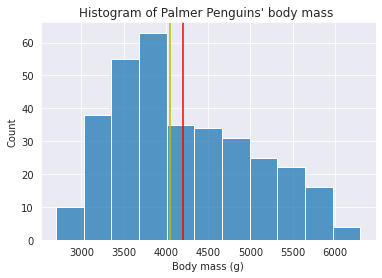

In [56]:
# 5번 : 분포의 치우침 시각화
# 팔머 펭귄 데이터의 몸무게(body_mass_g) 변수에 대한 히스토그램을 seaborn을 사용해 그려보세요.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
penguin_data = pd.read_csv(url)

# 데이터 전처리 및 변수 선택
penguin_data = penguin_data[~penguin_data.isnull().any(axis=1)]
penguin_data = penguin_data.drop(["island", "year"], axis = 1)

group_mean = penguin_data.body_mass_g.mean(axis=0)
group_median = penguin_data.body_mass_g.median(axis=0)

# 테마 설정
sns.set_style("darkgrid")

# 히스토그램 그리기
myplot = sns.histplot(data =penguin_data, x ="body_mass_g" )

# 제목 및 x축 제목 설정
myplot.set_xlabel("Body mass (g)")
myplot.set_title("Histogram of Palmer Penguins' body mass ")

# 평균, 중앙값 표시하기
plt.axvline(x = group_mean,color='r')
plt.axvline(x = group_median,color = 'y' )

plt.show()

In [58]:
#myplot = sns.histplot(penguin_data["body_mass_g"])
#myplot.set(title = "Histogram of Palmer Penguins' body mass", xlabel = "Body mass(g)", ylabel="Count")
#plt.axvline(group_mean[3], color = "r")
#plt.axvline(group_median[3], color = "yellow")
#plt.show()

# 분포의 퍼짐을 잡는 지표

In [83]:
# 1번 : IQR(Inter Quartile Range)
# 팔머 펭귄(Parmer penguins) 데이터의 bill_length_mm 변수의 종(species)별 IQR을 판다스(Pandas)의 median() 함수를 구하세요.

import pandas as pd

# data set load
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
penguin_data = pd.read_csv(url)

# data pre-processing
penguin_data = penguin_data[~penguin_data.isnull().any(axis=1)]
penguin_data = penguin_data.drop(["island", "year"], axis = 1)

group = penguin_data.groupby(["species"])

q1 = group.quantile(.25)
q3 = group.quantile(.75)

iqr = q3 - q1
iqr['bill_length_mm']


species
Adelie       4.050
Chinstrap    4.725
Gentoo       4.250
Name: bill_length_mm, dtype: float64

             min    25%    50%    75%    max
species                                     
Adelie     172.0  186.0  190.0  195.0  210.0
Chinstrap  178.0  191.0  196.0  201.0  212.0
Gentoo     203.0  212.0  216.0  221.5  231.0


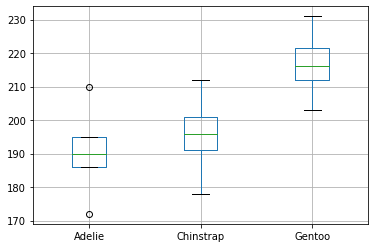

In [84]:
# 2번 : 5개 숫자로 요약하기 - Box plot (1)
# 팔머 펭귄(Parmer penguins) 데이터의 flipper_length_mm변수의 다섯숫자요약 정보와 종(species)별 Box plot을 그려보세요.
import matplotlib.pyplot as plt

boxplot_info = group['flipper_length_mm'].describe()[['min','25%','50%','75%','max']]
boxplot_info.transpose().boxplot(column = ["Adelie", "Chinstrap", "Gentoo"])
print(boxplot_info)
plt.show()

            min     25%    50%     75%   max
species                                     
Adelie     32.1  36.725  38.85  40.775  46.0
Chinstrap  40.9  46.350  49.55  51.075  58.0
Gentoo     40.9  45.350  47.40  49.600  59.6


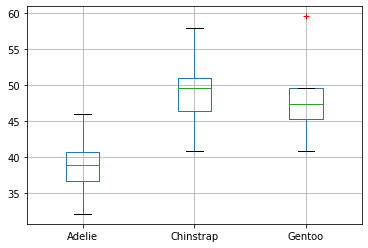

In [85]:
# 3번 : 특이점(outlier) 표시하기 - Box plot (2)
# 앞선 문제의 코드를 사용하여 팔머 펭귄(Parmer penguins) 데이터의 bill_length_mm 변수의 종(species)별 Box plot을 그려보고, Boxplot의 수염(Whisker) 정보를 가지는 DataFrame boxplot_info와 Boxplot 바깥의 outlier 정보를 담은 DataFrame outlier_info 를 구하는 코드를 작성해보세요.

boxplot_info = group['bill_length_mm'].describe()[['min','25%','50%','75%','max']]

print(boxplot_info)
flierprops = dict(marker='+', markeredgecolor='r',linestyle='none')
boxplot_info.transpose().boxplot(column = ["Adelie", "Chinstrap", "Gentoo"], flierprops=flierprops )
plt.show()

In [124]:
# 4번 : 분산과 표준편차
# 펭귄 데이터의 bill_length_mm 의 표본 분산과 표준 편차를 구하는 코드를 작성해보세요.
# (단, Pandas의 var() 과 std() 함수를 쓰지 않고 구해보세요.)
import numpy as np

x = penguin_data["bill_length_mm"]
mean = x.mean()
x_var = x.var()
x_std = x.std()

print(x_std)
print(x_var)


5.46866834264756
29.90633344187561


In [170]:
# 5번 : 분산과 표준편차의 성질
# 다음 조건에 명시된 5가지의 DataFrame을 pandas의 var()과 std() 함수를 써서 출력해보세요.

### Python package load ###
import warnings
import pandas as pd
import math

warnings.simplefilter(action='ignore', category=FutureWarning)

# data set load
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
penguin_data = pd.read_csv(url)

# data pre-processing
penguin_data = penguin_data[~penguin_data.isnull().any(axis=1)]
penguin_data = penguin_data.drop(["island", "year"], axis = 1)

group = penguin_data.groupby(["species"])
penguin_data_plus10 = penguin_data.set_index('species')[['bill_length_mm',	'bill_depth_mm','flipper_length_mm','body_mass_g']] + 10
penguin_data_x2 = penguin_data.set_index('species')[['bill_length_mm',	'bill_depth_mm','flipper_length_mm','body_mass_g']] * 2

result1 = group.var()
result2 = penguin_data_plus10.groupby('species').var()
result3 = penguin_data_x2.groupby('species').var()

# result checkout
#result2[0] / result1[0] # var
#result2[1] / result1[1] # std
#result3[0] / result1[0] # var
#result3[1] / result1[1] # std

print(penguin_data_plus10)
print(penguin_data_x2)
print(result1)
print(result2)
print(result3)

           bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
species                                                                 
Adelie               49.1           28.7              191.0       3760.0
Adelie               49.5           27.4              196.0       3810.0
Adelie               50.3           28.0              205.0       3260.0
Adelie               46.7           29.3              203.0       3460.0
Adelie               49.3           30.6              200.0       3660.0
...                   ...            ...                ...          ...
Chinstrap            65.8           29.8              217.0       4010.0
Chinstrap            53.5           28.1              212.0       3410.0
Chinstrap            59.6           28.2              203.0       3785.0
Chinstrap            60.8           29.0              220.0       4110.0
Chinstrap            60.2           28.7              208.0       3785.0

[333 rows x 4 columns]
           bill_length_mm  